In [1]:
# This script uses Kernel PCA to predict which wine belongs to which customer category.
# This can help in selling the right wine to the right customer.
# This dataset consists of different features related to the quality of wine, where each row represents a particular wine and
# each column represents a feature of the wine.

In [2]:
# 1. Data Pre-processing

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the dataset
dataset = pd.read_csv('Wine.csv')

# set the independent variables
X = dataset.iloc[:, :-1].values

# set the dependent variable
y = dataset.iloc[:, -1].values

In [4]:
# 2. Split the dataset into Testing and Training sets

In [5]:
# import train_test_split class from the model_selection module of the sklearn library
from sklearn.model_selection import train_test_split

# split the dataset into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# print X_train
print(X_train)

[[1.369e+01 3.260e+00 2.540e+00 ... 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 ... 1.160e+00 2.960e+00 3.450e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]


In [7]:
# print(Y_train)
print(y_train)

[3 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1
 1 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2 2 1 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2
 3 1 3 3 1 1 2 3 1 1 2 2 1 1 1 3 2 1 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3
 1 3 3 3 1 2 2 2 2 3 3 2 2 1 2 3 3 1 1 3 2 2 2 1 1 1 2 2 2 1 3]


In [8]:
# as you can see, the x_train and y_train values are very variable; hence we will perfoorm feature scaling on x_train and x_test

In [9]:
# 3. Feature Scaling

In [10]:
# import StandardScaler class from the preprocessing module of the sklearn class
from sklearn.preprocessing import StandardScaler

# create a StandardScaler instance
standard_scaler = StandardScaler()

# train the StandardScaler instance on the independent variable
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [11]:
# 4. Applying Kernel PCA

In [12]:
# import KernelPCA class from decomposition module of the sklearn library
from sklearn.decomposition import KernelPCA

# set an instance for KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')

# train the instance on the x_train and x_test
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [13]:
# 5. Train Logistic Regression model on the training set

In [14]:
# import LogisticRegression class from the linear_model module of the sklearn library
from sklearn.linear_model import LogisticRegression

# create a instance for LogisticRegression
classifier = LogisticRegression(random_state = 0)

# train the instance on the training sets
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# 6. Make the confusion matrix

In [16]:
# import confusion_matrix and accuracy_score from metrics module of sklearn library
from sklearn.metrics import confusion_matrix, accuracy_score

# predict Y values for X_test
y_predict = classifier.predict(X_test)

# create the confusion matrix
confusionmatrix = confusion_matrix(y_test, y_predict)

# print the confusionmatrix
print(confusionmatrix)

# show the accuracy score
accuracy_score(y_test, y_predict)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

In [17]:
# 7. Visualization

In [18]:
# view training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


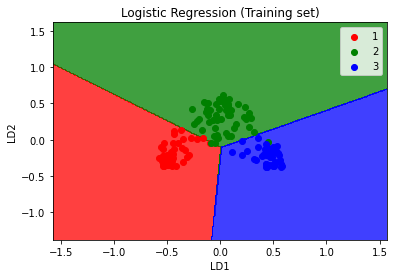

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [20]:
# view test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


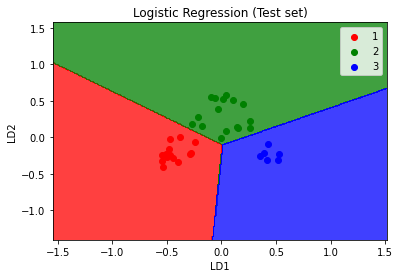

In [21]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

    plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()